---
title: "PCA"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

In [1]:
#| code-summary: "import libraries"
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)

In [2]:
#| code-summary: "produce synthetic data"
# center of the data
x_center = np.array([2.0, 1.0])
# standard deviations along the principal axes
sig = np.array([2.0, 0.5])
# rotation angle to makes things interesting
theta = np.pi / 3
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
Npoints = 10000
# reading from right to left:
# start away from the origin
# produce standardized gaussian data N(0, 1) in 2D
# scale the data along the principal axes
# rotate the data
X = R @ np.diag(sig) @ np.random.randn(2, Npoints) + x_center[:, None]

Text(0, 0.5, 'y')

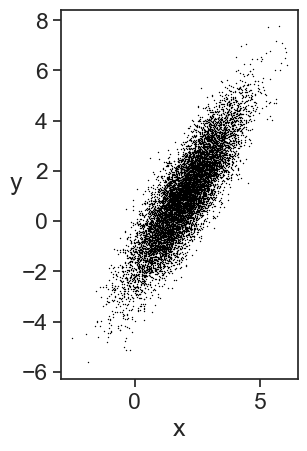

In [3]:
#| code-summary: "plot"
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.plot(X[0, :], X[1, :], label="data", marker='.', alpha=1.0, linestyle='None', markersize=2, markerfacecolor='black', markeredgecolor='None')
ax.set_xlabel("x")
ax.set_ylabel("y", rotation=0)

Let's perform PCA using the SVD.

In [4]:
#| code-summary: "perform PCA"
# first, compute the average of the data
x_avg = X.mean(axis=1)
# standardize the data
Z = (X - x_avg[:, None]) / np.sqrt(Npoints)
# compute the SVD of the standardized data
U, S, VT = np.linalg.svd(Z, full_matrices=False)

In [13]:
#| code-summary: "calculate a few things to plot"
angles = np.linspace(0, 2 * np.pi, 360)
circl = np.array([np.cos(angles), np.sin(angles)])
PC = U*S
std = PC@circl

Text(0, 0.5, 'y')

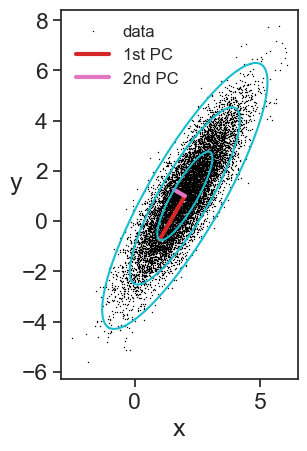

In [14]:
#| code-summary: "plot"
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.plot(X[0, :], X[1, :], label="data", marker='.', alpha=1.0, linestyle='None', markersize=2, markerfacecolor='black', markeredgecolor='None')
ax.plot([x_avg[0], x_avg[0] + PC[0,0]], [x_avg[1], x_avg[1] + PC[1,0]], color="tab:red", label="1st PC", linewidth=3)
ax.plot([x_avg[0], x_avg[0] + PC[0,1]], [x_avg[1], x_avg[1] + PC[1,1]], color="tab:pink", label="2nd PC", linewidth=3)
ax.plot(x_avg[0] + 1.0*std[0], x_avg[1] + 1.0*std[1], color="tab:cyan")
ax.plot(x_avg[0] + 2.0*std[0], x_avg[1] + 2.0*std[1], color="tab:cyan")
ax.plot(x_avg[0] + 3.0*std[0], x_avg[1] + 3.0*std[1], color="tab:cyan")
ax.legend(fontsize=12, frameon=False)
ax.set_xlabel("x")
ax.set_ylabel("y", rotation=0)

## principal components, projections, and standard deviations

[(-5.9973274930379485, 10.002672506962051),
 (-6.997230307579574, 9.002769692420426)]

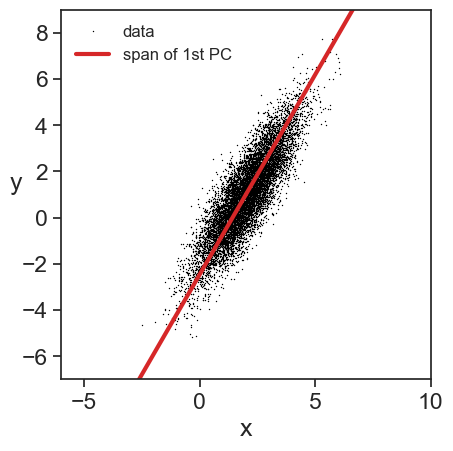

In [21]:
#| code-summary: "plot"
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.plot(X[0, :], X[1, :], label="data", marker='.', alpha=1.0, linestyle='None', markersize=2, markerfacecolor='black', markeredgecolor='None')

ax.plot([x_avg[0], x_avg[0] + 5*PC[0,0]], [x_avg[1], x_avg[1] + 5*PC[1,0]], color="tab:red", linewidth=3)
ax.plot([x_avg[0], x_avg[0] - 5*PC[0,0]], [x_avg[1], x_avg[1] - 5*PC[1,0]], color="tab:red", label="span of 1st PC", linewidth=3)

ax.legend(fontsize=12, frameon=False)
ax.set_xlabel("x")
ax.set_ylabel("y", rotation=0)
ax.set(xlim=(x_avg[0]-4.0*sig[0], x_avg[0]+4.0*sig[0]),
       ylim=(x_avg[1]-4.0*sig[0], x_avg[1]+4.0*sig[0]))

In [24]:
X.shape

(2, 10000)

In [26]:
U[:,0].shape

(2,)

In [35]:
projection1 = X.T@U[:,0]
projection2 = X.T@U[:,1]

In [36]:
projection1.std()
projection2.std()

0.4956279413835442

Text(0.5, 1.0, 'Histogram of Projections')

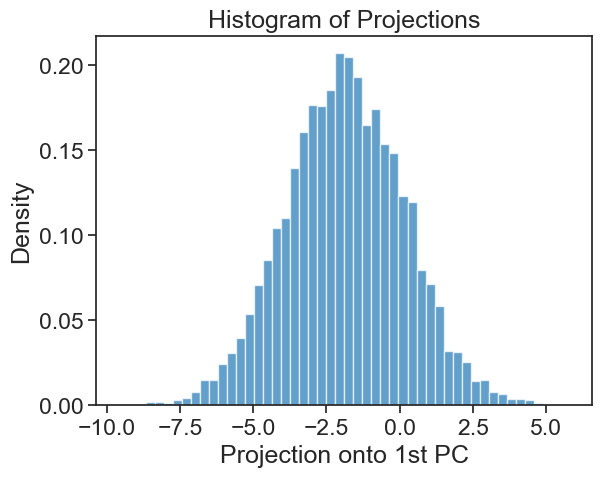

In [33]:
# plot histogram of the projection1
fig, ax = plt.subplots()
ax.hist(projection1, bins=50, density=True, alpha=0.7, color='tab:blue')
ax.set_xlabel("Projection onto 1st PC")
ax.set_ylabel("Density")
ax.set_title("Histogram of Projections")